In [1]:
#Importing basic librariries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Extracting data into a and b dataframes

a=pd.read_csv('zomato.csv')
b=pd.read_csv('Country-code.csv')
print(a.shape)
print(b.shape)

(9551, 21)
(15, 3)


### Data is available in the form of two separate files. So, we combine them using merge function

In [3]:
# Merging the data using inner join which is in 2 dataframes

data=pd.merge(a,b,how='inner')
data.shape

(9551, 23)

In [4]:
data.head() 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Asia
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Asia
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,Asia
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,Asia


In [5]:
# Helps in finding the number of null values in the whole dataset

data.isnull().sum() 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Continent               0
dtype: int64

### There are 9 null values in the cuisines column which will be treated further

In [6]:
#Lets see the records or ros that have null values in the Cuisines features

data[data.Cuisines.isnull()==True]

#The common thing that can be observed from the records belo is that,  all the records with null vaues in the cuisine feature belongs to "United States"
#Lets treat the null values after splitting the data into train ans test data. Becuase, we re however going to dropo the Cusines feature in further code.

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Continent
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,1,3.4,Orange,Average,34,United States,America
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,1,3.4,Orange,Average,36,United States,America
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,1,3.9,Yellow,Good,160,United States,America
288,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,3,3.9,Yellow,Good,209,United States,America
312,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,3,3.8,Yellow,Good,102,United States,America
328,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,1,3.4,Orange,Average,11,United States,America
349,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,3,4.4,Green,Very Good,1158,United States,America
395,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,1,4.7,Dark Green,Excellent,707,United States,America
432,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,1,3.9,Yellow,Good,309,United States,America


In [7]:
data.columns #Gives the number of columns that are in the dataset that we want to work on

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Continent'],
      dtype='object')

In [8]:
data['Switch to order menu'].value_counts() # Gives us the number of unique responses that are in "Switch to order menu " feature

No    9551
Name: Switch to order menu, dtype: int64

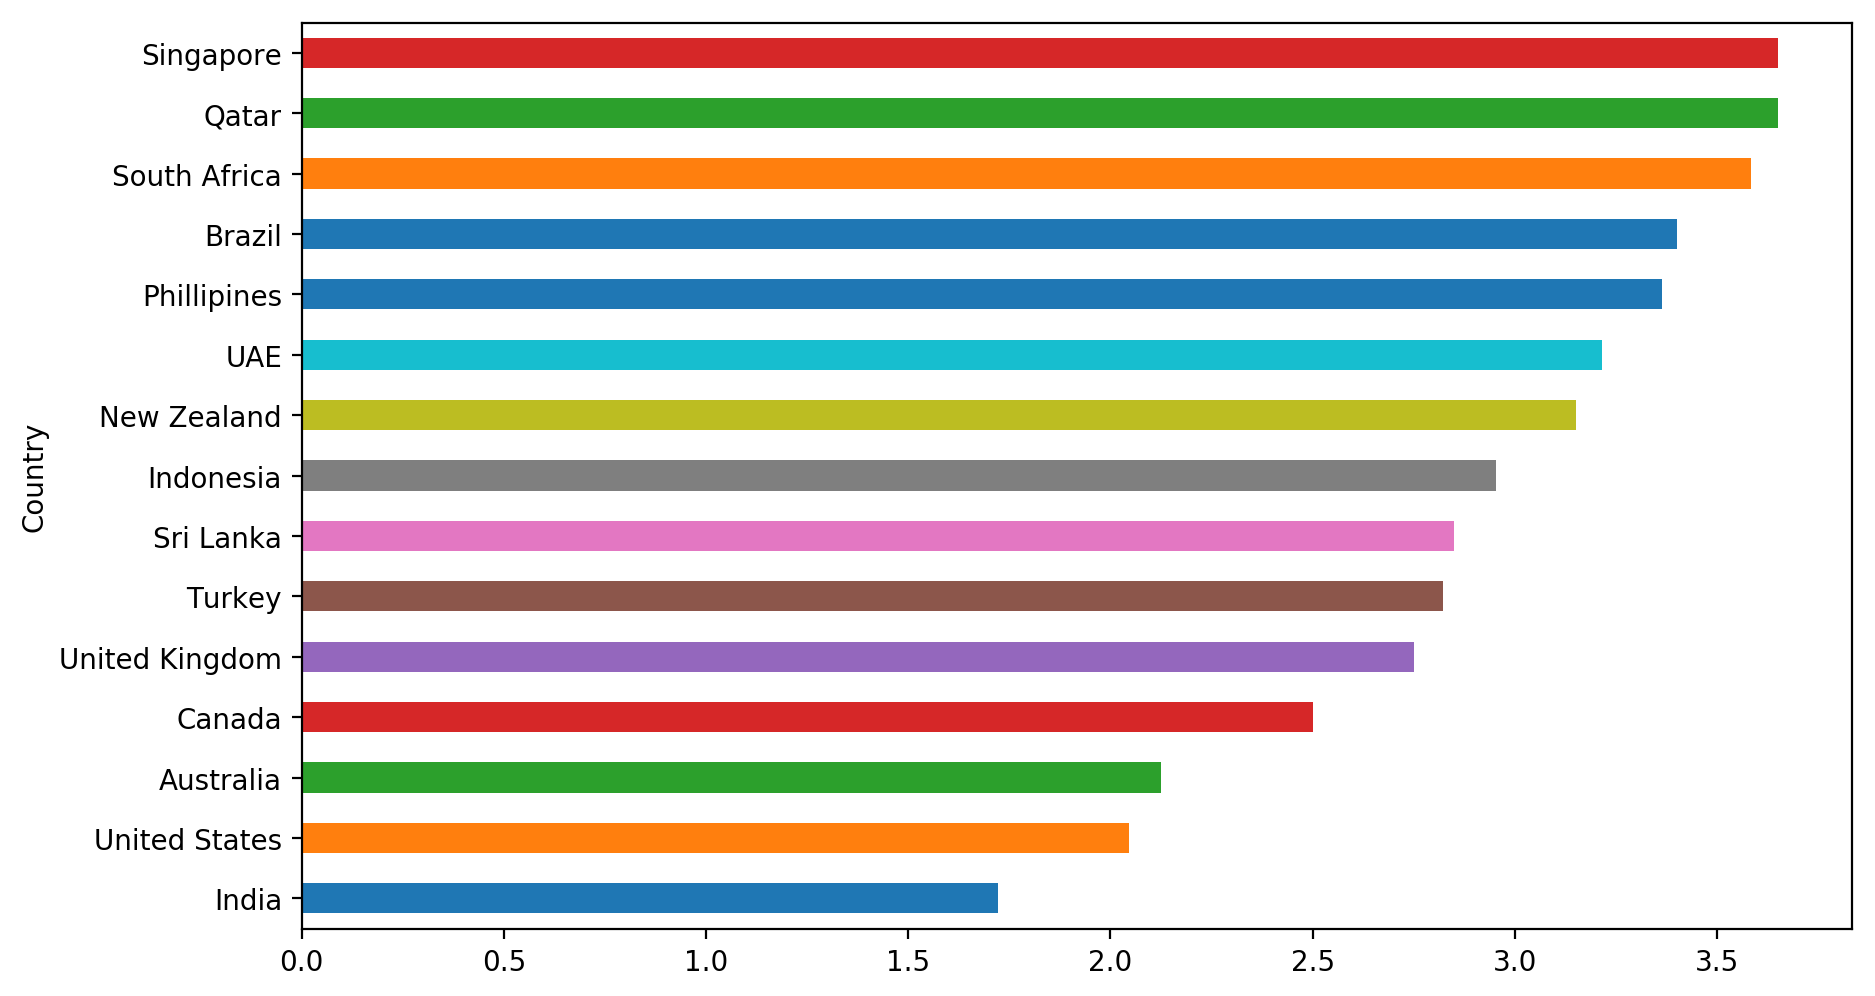

In [9]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(6,4),dpi=100)
data.groupby(['Country']).mean()['Price range'].sort_values().plot(kind='barh',figsize=(10,6))

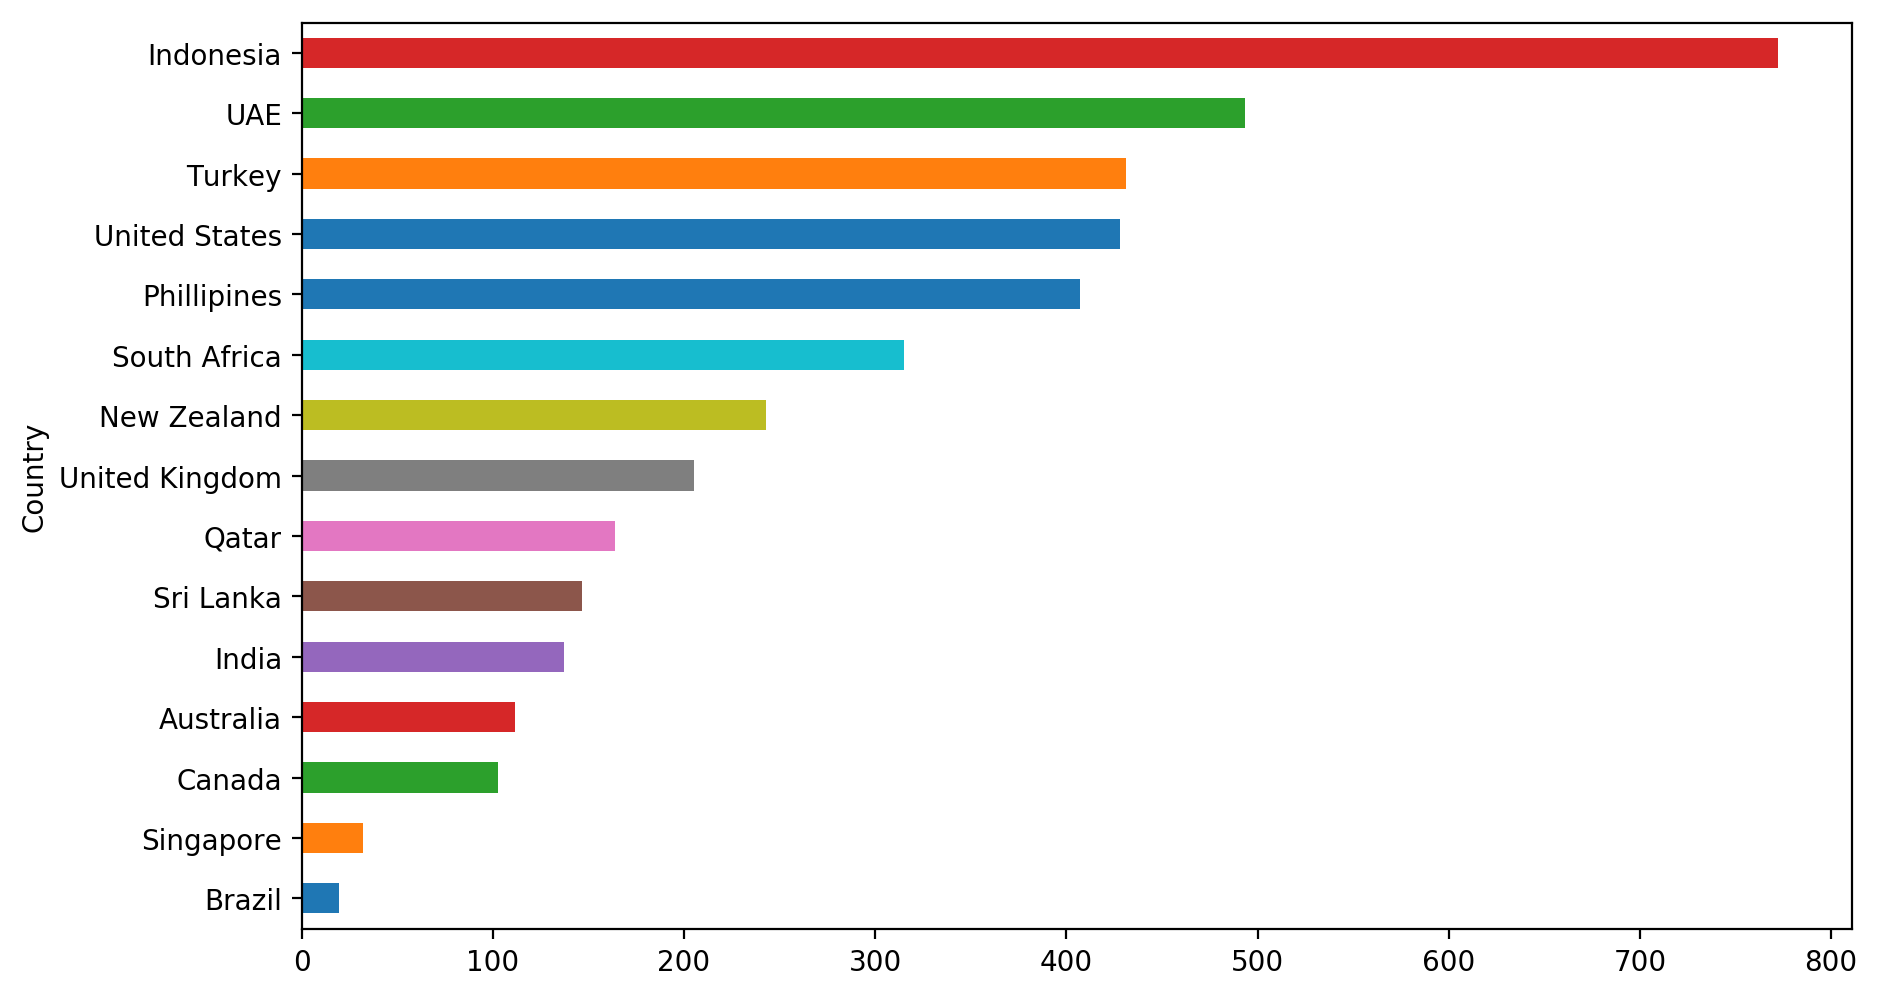

In [10]:
#In this plot, number of votes given to a restauatnt on an average can be known.
#We can observe that the votes given are highest for Asian countries(4 out of 5 are Asian) 

%config InlineBackend.figure_format = 'retina'
df=data.groupby(['Country']).mean()
plt.figure(figsize=(8,5),frameon=True,dpi=100)
df['Votes'].sort_values().plot(kind='barh',figsize=(10,6))

### As we can see that switch to order is not presenet in any of the restaurants, it does not give much information

In [11]:
data['Rating color'].value_counts() # Gives us the number of records that has Orange, White, Yellow etc,. in 'Rating Color' feature

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [12]:
data['Rating text'].value_counts() # Gives us the number of records that has AVergae, Not rated, Good etc,. in 'Rating text' feature

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

### From the above 2 cells, we can see that Rating text and Rating color are representing the same thing in a different format. So, we can delete either of the columns.

In [13]:
# Features with the following features are droppped :

# That are producing redundant information
# That has 100% percent co relation with other features
# The features that has no significance in predicting the rating
# That requires NLP or other complex algorithms to analyse

data.drop(['Country Code','Restaurant ID', 'Restaurant Name','Address','Locality','Locality Verbose','Longitude', 'Latitude', 'Switch to order menu','Rating color'],axis=1,inplace=True)

In [14]:
#Lets rename the feature names without any gaps. Because, gaps in the olumn names may create trouble while indexing.
#It is good practice to avoid spaces, gaps in the column name

data.columns=['City', 'Cuisines', 'Avg_cost', 'Currency',
       'Table_booking', 'Online_delivery', 'Delivering_now',
       'Price_range', 'Rating', 'Rating_text', 'Votes', 'Country',
       'Continent']

In [15]:
#lets create 2 dataframes in which one has target variable (i.e. Rating) and latter has predictor variables
# X datframe has predictor variables while y datframe has target variable

X=data.drop('Rating',axis=1)
y=data['Rating']

In [16]:
#Here, I am splitting 2 dataframes into 4 parts.
#They are 2 target variable datframes (i.e. y_train and y_test) and 2 predictor variables datframes (X_train and X_test)
#X_train is used to train the model using predictor variables while X_test has same features as X_train which is used while testing the model
#y_train is used as a target variable while training the model while y_test is compared with the predicted values after testing the model

#Importing essential librarie
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split


#SPlitting the data into 4 datframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Engineering 

### Lets create a new feature which counts the number of cuisines that a restaurant offers. The column Cuisines has few hunderds of different cuisines and some of the same cuisines are written with different spellings. Hence, it is very difficult to rectify those. However, while building a model, when encoding will be done, it will be heavy on computing and also may lead to Curse of Dimensionality as the number of features will become few hundreds.

In [17]:
#Helps in finding the popular cuisines

data.Cuisines.value_counts()

North Indian                                                936
North Indian, Chinese                                       511
Chinese                                                     354
Fast Food                                                   354
North Indian, Mughlai                                       334
Cafe                                                        299
Bakery                                                      218
North Indian, Mughlai, Chinese                              197
Bakery, Desserts                                            170
Street Food                                                 149
Pizza, Fast Food                                            131
Chinese, Fast Food                                          118
Mithai, Street Food                                         116
South Indian                                                112
Bakery, Fast Food                                           108
Chinese, North Indian                   

In [18]:
#As the number of cuisines are very high and to make the code identify each cuisines and count it, NLP might be needed.
#So, instead of including the cuisisnes itself, we can also count the number of cuisines offered by the restaurant
# Lets create a new feature that gives the number of cuisines offered by each restaurant

X_train['no_of_cuisines'] = data.Cuisines.str.count(',')+1
X_train.head()

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,City,Cuisines,Avg_cost,Currency,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,Country,Continent,no_of_cuisines
2629,New Delhi,"North Indian, South Indian",500,Indian Rupees(Rs.),No,No,No,2,Good,44,India,Asia,2.0
4685,New Delhi,"Chinese, North Indian",500,Indian Rupees(Rs.),No,No,No,2,Average,10,India,Asia,2.0
6159,New Delhi,Pizza,600,Indian Rupees(Rs.),No,No,No,2,Not rated,0,India,Asia,1.0
9197,Surat,"Chinese, Thai, Asian",800,Indian Rupees(Rs.),No,No,No,3,Good,226,India,Asia,3.0
5605,New Delhi,North Indian,200,Indian Rupees(Rs.),No,No,No,1,Not rated,0,India,Asia,1.0


In [19]:
X_test['no_of_cuisines'] = data.Cuisines.str.count(',')+1
X_test.head()

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,City,Cuisines,Avg_cost,Currency,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,Country,Continent,no_of_cuisines
4731,New Delhi,North Indian,350,Indian Rupees(Rs.),No,No,No,1,Poor,54,India,Asia,1.0
1468,Gurgaon,"Mughlai, Hyderabadi",700,Indian Rupees(Rs.),No,Yes,No,2,Very Good,84,India,Asia,2.0
9037,Noida,"North Indian, Mughlai",550,Indian Rupees(Rs.),No,No,No,2,Average,36,India,Asia,2.0
7866,New Delhi,Fast Food,200,Indian Rupees(Rs.),No,Yes,No,1,Very Good,163,India,Asia,1.0
5570,New Delhi,"North Indian, Mughlai",400,Indian Rupees(Rs.),No,No,No,1,Good,14,India,Asia,2.0


### As there are 9 null values in the cuisisnes, there are also 9 null values in the no_of_cuisines feature.

In [20]:
#In the X_train datframe, lets see the number of records with different number of cuisines

X_train.no_of_cuisines.value_counts()

2.0    2418
1.0    2388
3.0    1272
4.0     400
5.0     114
6.0      51
7.0      26
8.0      11
Name: no_of_cuisines, dtype: int64

In [21]:
#In the X_test datframe, lets see the number of records with diferent number of cuisisnes

X_test.no_of_cuisines.value_counts()

2.0    1026
1.0    1006
3.0     568
4.0     184
5.0      50
6.0      23
8.0       3
7.0       2
Name: no_of_cuisines, dtype: int64

### Since 2 number of cuisines is mode for United States in both train and test, lets impute the null values with 3 in both X_train and X-test dataframes 

In [22]:
#Imputing the null values with the model  in "no_of_cusisnes"

X_train["no_of_cuisines"].fillna(2, inplace = True)
X_test["no_of_cuisines"].fillna(2, inplace = True)

C:\Users\Hemanth\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
data.isnull().sum()

City               0
Cuisines           9
Avg_cost           0
Currency           0
Table_booking      0
Online_delivery    0
Delivering_now     0
Price_range        0
Rating             0
Rating_text        0
Votes              0
Country            0
Continent          0
dtype: int64

### Lets create a new feature named Continent which inlcudes respective countries that belong to a continent. This feature gives the model some extra information.

In [24]:
#A function is being created that helps in assigning continnets to their respective countries

def continent (x):
    if (x in ['United States','Canada','Brazil']):
        return ('Americas')
    elif (x in ['India','Phillipines','Sri Lanka','UAE' ,'Indonesia' ,'Qatar','Singapore']):
        return ('Asia')
    elif (x in ['Australia','New Zealand']):
        return ('Australia_continent')
    elif (x in ['Turkey','United Kingdom']):
        return ('Europe')
    else:
        return ('Africa')

In [25]:
#Here the fuction is being called which creates a new feature named continent by checking with the "Country" feature

X_train['Continent']=X_train['Country'].apply(continent)
X_test['Continent']=X_test['Country'].apply(continent)

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


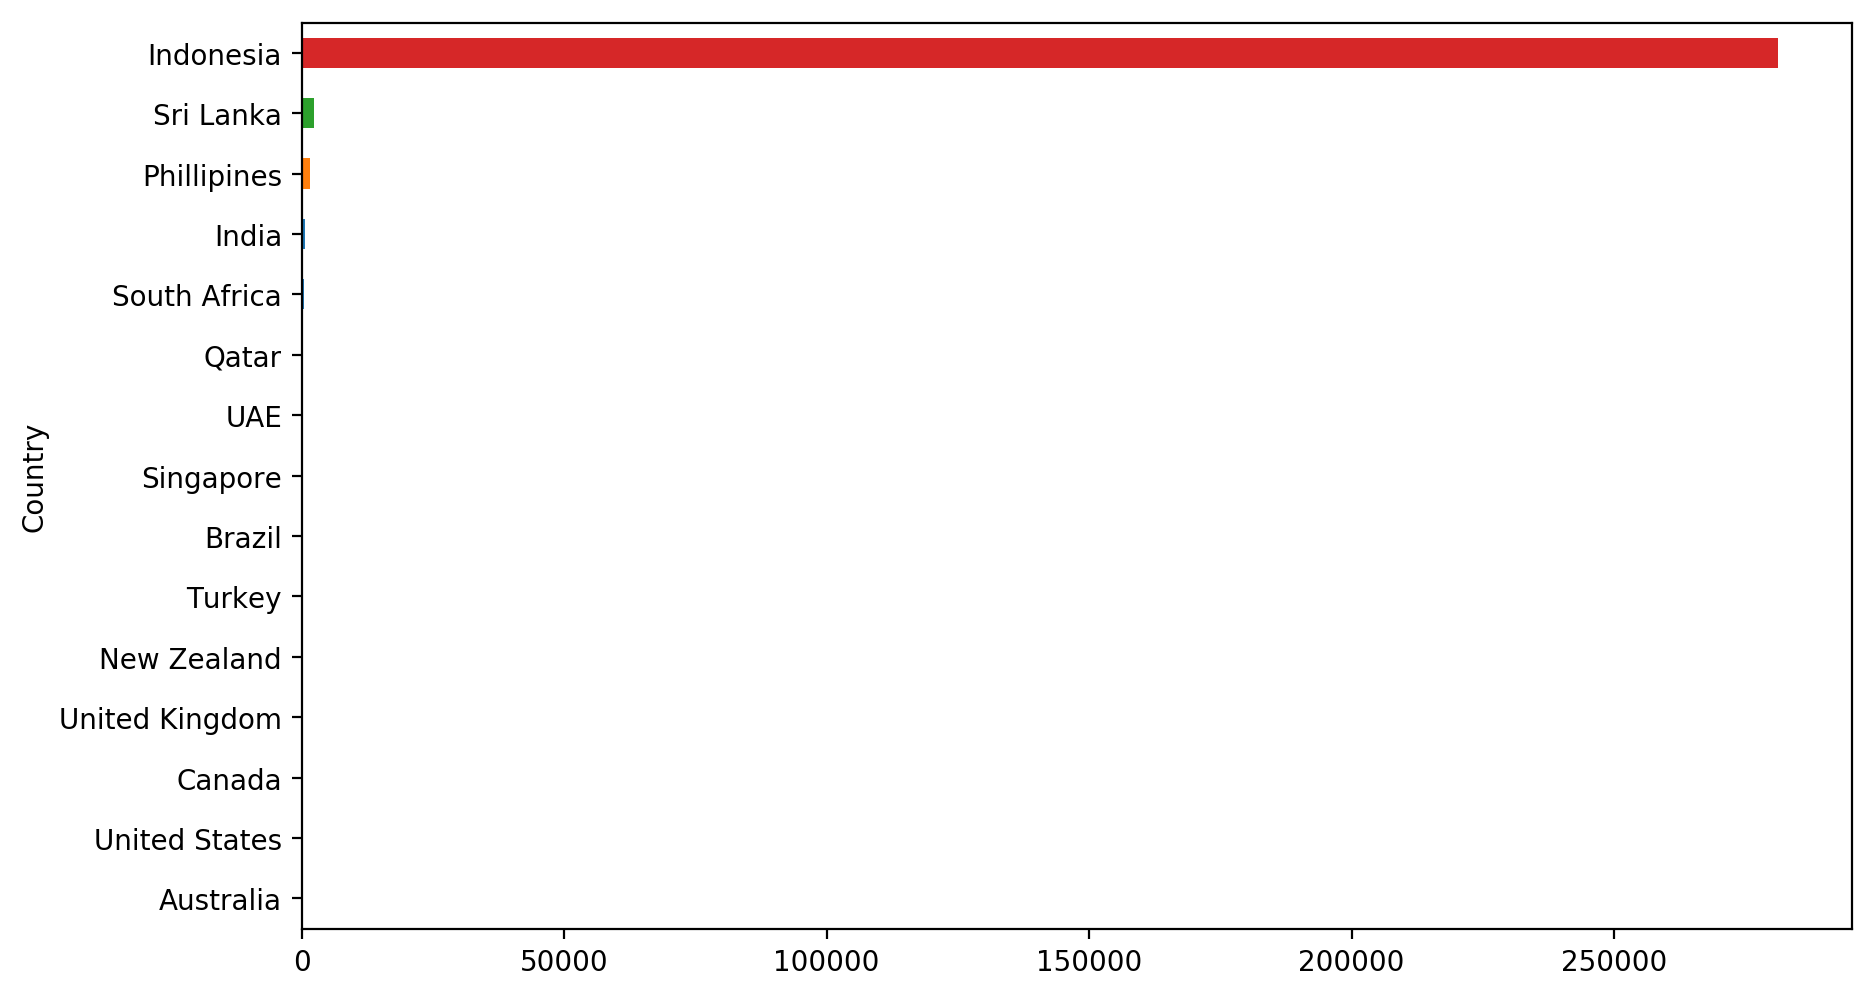

In [26]:
#Lets plot the amount spent at restaurants in different countries

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(8,5),dpi=100)
data.groupby(['Country']).mean()['Avg_cost'].sort_values().plot(kind='barh',figsize=(10,6))

### From the above plot, we can see that the cost in Indonesia is very high which is due to the amount they pay for food. In the given data, each country's average cost is mentioned in their respective currency. Lets standardize the currency unit to Dollar. Below conversion rates are according to Google on the day of writing this code

In [27]:
conversion_rates= {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(Œ£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

In [28]:
X_train['New_cost'] = X_train['Avg_cost'] * X_train['Currency'].map(conversion_rates)
X_test['New_cost'] = X_test['Avg_cost'] * X_test['Currency'].map(conversion_rates)

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


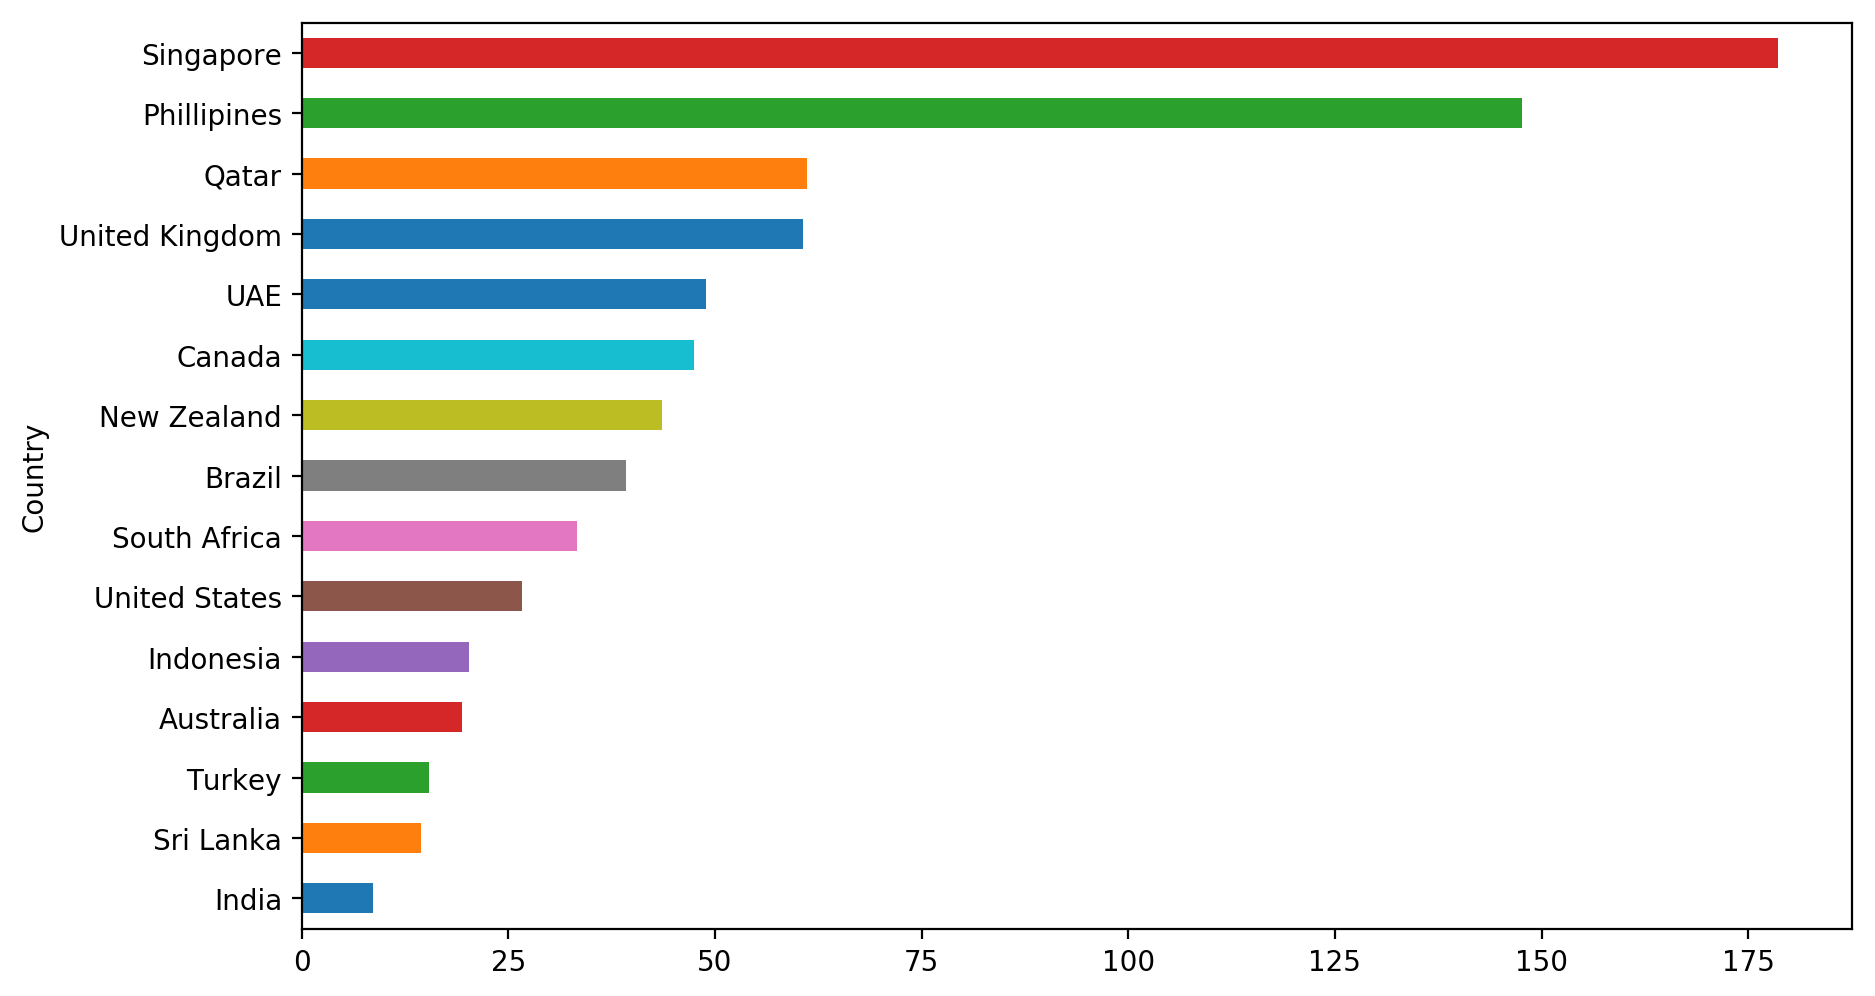

In [29]:
plt.figure(figsize=(8,5),dpi=100)
X_train.groupby(['Country']).mean()['New_cost'].sort_values().plot(kind='barh',figsize=(10,6))

### Now, after bringing all country's cost into Dollar, we can observe that Singapore has the expensive food while India has the least expensive food. 

In [30]:
#As model can only read numeric values, lets assign values to the rating text, Excellent being the highest(i.e. 5) and poor being the least (i.e. 1)
# These texts will be replaced by the given numbers in train and test data. So that we can include this feature in the model 

dictionary = {'Excellent': 5,'Very Good': 4,'Average': 2,'Good': 3,'Not rated': 2,'Poor': 1} 
X_train.Rating_text = [dictionary[item] for item in X_train.Rating_text] 
X_test.Rating_text = [dictionary[item] for item in X_test.Rating_text] 

C:\Users\Hemanth\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
#Here encoding is being done in both X_train and X_test dataframes

Binary= {'Yes': 1,'No': 0} 

X_train.Online_delivery = [Binary[item] for item in X_train.Online_delivery] 
X_train.Table_booking = [Binary[item] for item in X_train.Table_booking] 
X_train.Delivering_now = [Binary[item] for item in X_train.Delivering_now] 

X_test.Online_delivery = [Binary[item] for item in X_test.Online_delivery] 
X_test.Table_booking = [Binary[item] for item in X_test.Table_booking] 
X_test.Delivering_now = [Binary[item] for item in X_test.Delivering_now] 

In [32]:
len(data.City.unique())

141

In [33]:
#Lets drop avg_cost feature as new feature is created (i.e. New_cost)
#Cuisines feature is not required as numer of cuisines is created
# Currecny feature is not required as we have standardized everything into dollars
# Lets drop city feature also as there are 141 different cities and when encoding is done, it may create a curse of dimensionality
# If we feel city feature is mandatory, 141 new features will be created and to reduce the dimensions, we need to do PCA
# In this code, as PCA is not being done, lets drop City feature too

X_train.drop(['Avg_cost','Cuisines','Currency','City'],axis=1,inplace=True)
X_test.drop(['Avg_cost','Cuisines','Currency','City'],axis=1,inplace=True)

C:\Users\Hemanth\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
print(X_train.shape)
print(X_test.shape)

(6685, 10)
(2866, 10)


In [35]:
data.head().T

,0,1,2,3,4
City,Makati City,Makati City,Mandaluyong City,Mandaluyong City,Mandaluyong City
Cuisines,"French, Japanese, Desserts",Japanese,"Seafood, Asian, Filipino, Indian","Japanese, Sushi","Japanese, Korean"
Avg_cost,1100,1200,4000,1500,1500
Currency,Botswana Pula(P),Botswana Pula(P),Botswana Pula(P),Botswana Pula(P),Botswana Pula(P)
Table_booking,Yes,Yes,Yes,No,Yes
Online_delivery,No,No,No,No,No
Delivering_now,No,No,No,No,No
Price_range,3,3,4,4,4
Rating,4.8,4.5,4.4,4.9,4.8
Rating_text,Excellent,Excellent,Very Good,Excellent,Excellent


### Brazil has the least number of votes while Indonesia has the maximum

In [36]:
df.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country,,,,,,,,
Australia,1.672914e+07,14.0,144.601833,-33.764464,24.083333,2.125000,3.658333,111.416667
Brazil,6.869641e+06,30.0,-45.932703,-20.780126,134.666667,3.400000,3.763333,19.616667
Canada,1.665633e+07,37.0,-93.700900,47.200881,36.250000,2.500000,3.575000,103.000000
India,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
Indonesia,1.159798e+07,94.0,101.757266,-5.980983,281190.476190,2.952381,4.295238,772.095238


In [37]:
#ENcoding is being done for continents in train and test data sets

train_conti=pd.DataFrame(pd.get_dummies(X_train.Continent))
test_conti=pd.get_dummies(X_test.Continent)

In [38]:
#ENcoding is being done for countries in train and test data sets

train_countr=pd.get_dummies(X_train.Country)
test_countr=pd.get_dummies(X_test.Country)

In [39]:
#The encoded dataframes are being merged to the train and test datasets

X_train=pd.concat([X_train,train_conti,train_countr],axis=1)
X_test=pd.concat([X_test,test_conti,test_countr],axis=1)

In [40]:
#As country and continent features are included in the datasets in the form of encoded data, lets drop the orginal features

X_train.drop(['Country','Continent'],axis=1,inplace=True)
X_test.drop(['Country','Continent'],axis=1,inplace=True)

In [41]:
# Lets rename the columns in both train and test datasets

X_train.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']
X_test.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']

### Scaling. Lets apply zscore for the purpose of data scaling

In [42]:
#Importing libraries

from sklearn import model_selection
from scipy.stats import zscore
from sklearn.metrics import explained_variance_score

In [43]:
#Zscore scaling is being done here in both train and test datsets

train_scale=pd.DataFrame(zscore(X_train,axis=1))
test_scale=pd.DataFrame(zscore(X_test,axis=1))

In [44]:
#After scaling the dataset, there will be no feature names. So, lets give feature names

train_scale.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']
test_scale.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']

In [45]:
#Lets see how the scaling has transformed our original data

train_scale.head()

,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,no_of_cuisines,New_cost,Africa,Americas,...,NewZealand,Phillipines,Qatar,Singapore,SouthAfrica,SriLanka,Turkey,UAE,UnitedKingdom,UnitedStates
0,-0.261832,-0.261832,-0.261832,-0.017455,0.104733,5.114443,-0.017455,0.593485,-0.261832,-0.261832,...,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832
1,-0.398334,-0.398334,-0.398334,0.493934,0.493934,4.063003,0.493934,2.724602,-0.398334,-0.398334,...,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334
2,-0.340418,-0.340418,-0.340418,0.897466,0.897466,-0.340418,0.278524,4.858696,-0.340418,-0.340418,...,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418
3,-0.211831,-0.211831,-0.211831,-0.140140,-0.140140,5.188931,-0.140140,0.055817,-0.211831,-0.211831,...,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831
4,-0.459933,-0.459933,-0.459933,1.003490,2.466914,-0.459933,1.003490,3.637653,-0.459933,-0.459933,...,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933


In [46]:
# Lets round off the values as after certan  nnumber of decimal places, the values does not make significant difference and becomes heavy on the computation

train_scale=np.round(train_scale,decimals=4)
test_scale=np.round(test_scale,decimals=4)
y_train=np.round(y_train,decimals=4)

### LINEAR REGRESSION

In [47]:
# implementation of Linear Regression model using scikit-learn


from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [48]:


lr = LinearRegression() # Defing the linear regression model 
lr.fit(train_scale,y_train) #Fitting the data into the algorithm
lr_pred = lr.predict(test_scale) #Predicting using Linear regression model

#Metrics for comaprision between prediction and original values
print(r2_score(y_test,np.round(lr_pred,decimals=1))) 
print('RMSE score through Linear regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(lr_pred,decimals=1))))

0.847248722492469
RMSE score through Linear regression :  0.5886694756568686


### Decision Tree regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(train_scale,y_train)
dt_pred=dt.predict(test_scale)
print('RMSE score through Decision tree regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(dt_pred,decimals=1))))

RMSE score through Decision tree regression :  0.3417862850081597


### RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(train_scale,y_train)
rf_pred=rf.predict(test_scale)
print('RMSE score through Random Forest : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(rf_pred,decimals=1))))

C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE score through Random Forest :  0.27952956193293277


#### In the following plots, x axis shos the actual rating values while y axis shows the predicted ratings. Ideally when the modes predict exactly same as the actual values, there has to be a straight line passing through origin. 


#### Since, 100% accuracy is not possible, a slim distribution of points is acceptable. Slimmer the distrbution better the accuracy of the model

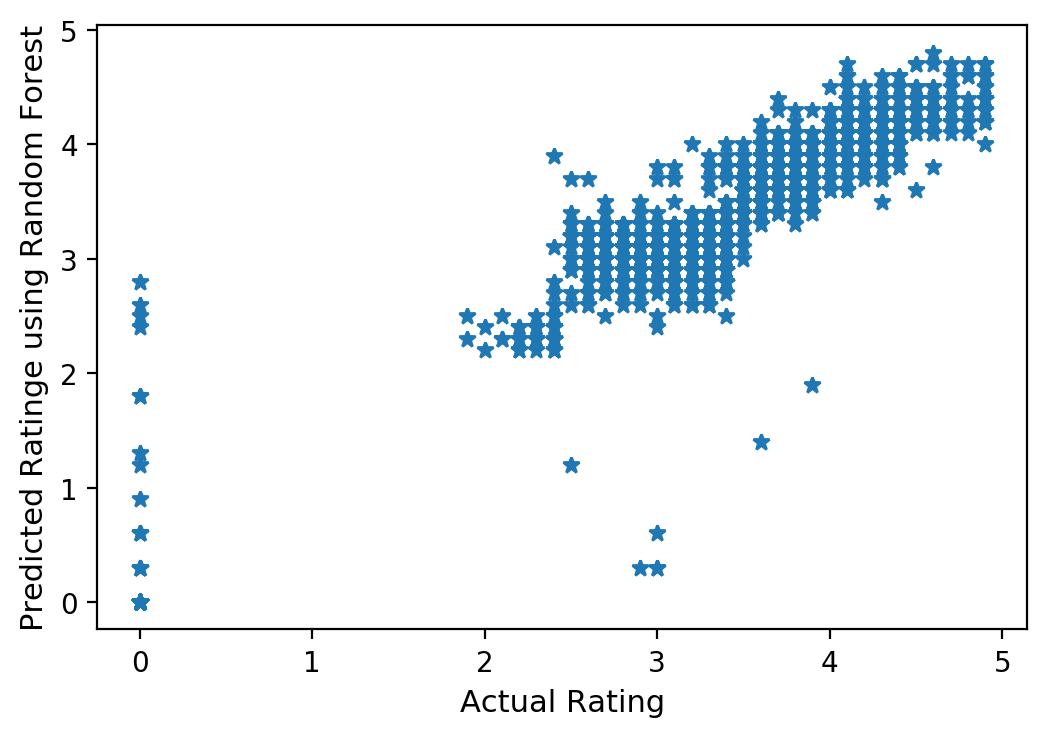

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,np.round(rf_pred,decimals=1),'*')
plt.xlabel('Actual Rating',size=11)
plt.ylabel('Predicted Ratinge using Random Forest',size=11)
plt.show()

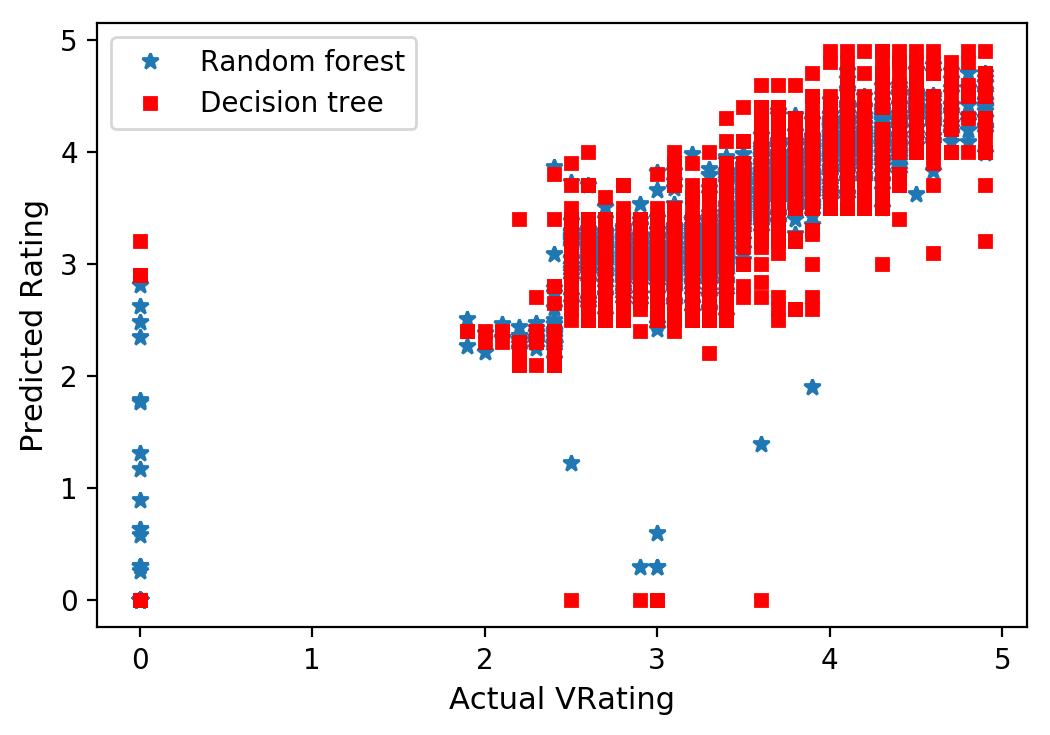

In [52]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,rf_pred,'*',label='Random forest')
plt.plot(y_test,dt_pred,'o',color='red',label='Decision tree',marker='s',markersize=4)
plt.legend()
plt.xlabel('Actual VRating',size=11)
plt.ylabel('Predicted Rating',size=11)
plt.show()

#### From the above scatter plots, we can observe that the decision tree has more spread out predictions when compared to slimmer scatter points of Random Forest. We can visually see that the Random forest has better performance than the decision tree.

### XG BOOST REGRESSOR

In [53]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=4)
xgb.fit(train_scale,y_train)
xgb_pred= xgb.predict(test_scale)
print('RMSE score through XGBoost : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))
print('Variance covered by XG Boost Regression : ',explained_variance_score(xgb_pred,y_test))

C:\Users\Hemanth\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE score through XGBoost :  0.2701153773436866
R square value using XGBoost 0.9681836825457216
Variance covered by XG Boost Regression :  0.9671952431290927


### Learning rate and max depth re taken in such a way that it gives the least rmse score. Mutliple scores are obtained by trial and error method.

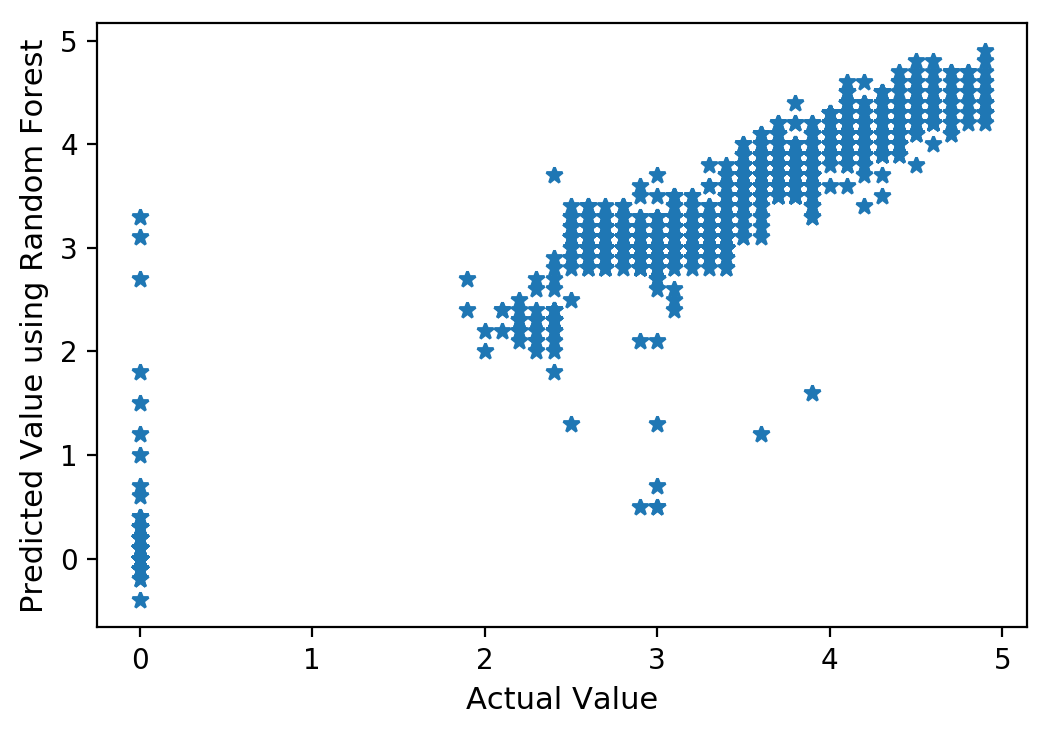

In [54]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,np.round(xgb_pred,decimals=1),'*')
plt.xlabel('Actual Value',size=11)
plt.ylabel('Predicted Value using Random Forest',size=11)
plt.show()

### Comparison among different models predicting the continous variable

In [55]:
print('RMSE score through Linear Regression : ',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
print('R square value using Linear Regression',r2_score(y_test,np.round(lr_pred,decimals=1)))
print('Variance covered by Linear Regression : ',explained_variance_score(lr_pred,y_test))
print('\n')
print('RMSE score through Decision tree Regression : ',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))
print('R square value using Decision Tree Regression',r2_score(y_test,np.round(dt_pred,decimals=1)))
print('Variance covered by Decision Tree Regression : ',explained_variance_score(dt_pred,y_test))
print('\n')
print('RMSE score through Random Forest : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(rf_pred,decimals=1))))
print('R square value using Random Forest',r2_score(y_test,rf_pred))
print('Variance covered by Random Forest : ',explained_variance_score(rf_pred,y_test))
print('\n')
print('RMSE score through XGBoost : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))
print('Variance covered by XG Boost Regression : ',explained_variance_score(xgb_pred,y_test))

RMSE score through Linear Regression :  0.5875018758773038
R square value using Linear Regression 0.847248722492469
Variance covered by Linear Regression :  0.8243990924914888


RMSE score through Decision tree Regression :  0.3419416687155076
R square value using Decision Tree Regression 0.9485066578300361
Variance covered by Decision Tree Regression :  0.9481946134875319


RMSE score through Random Forest :  0.27952956193293277
R square value using Random Forest 0.9658616750660434
Variance covered by Random Forest :  0.9647946095883291


RMSE score through XGBoost :  0.2701153773436866
R square value using XGBoost 0.9681836825457216
Variance covered by XG Boost Regression :  0.9671952431290927


### Conclusons

>- XG Boost regressor has the least rmse score which indirectly tells us that it is the most accurte model among the 4 models
>- R square value and Variance explained are almost equal
>- Variance explained by XG Boost regressor and Random forest are amost equal
>- Generally, Random Forest is expected to have lower RMSE than a Decsion Tree which is evident in our case study
>- Due to the assumptions of Linear Regression algorithm which is a bit offset from the real case scenaro, Linear Regression has under performed